In [92]:
import pandas as pd
import seaborn as sns
import numpy as np

In [93]:
from pathlib import Path

notebook_path = Path.cwd()
target_dir = 'ai_practice'
project_root = ''

for parent in notebook_path.parents:
    if parent.name == target_dir:
        project_root = parent
        break

dataset_dir = 'titanic/train.csv'
csv_path = project_root / 'assets/files' / dataset_dir
df = pd.read_csv(csv_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

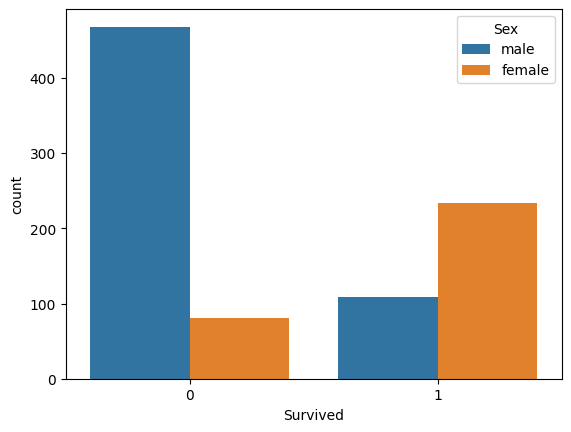

In [94]:
sns.countplot(data=df, x='Survived', hue='Sex')

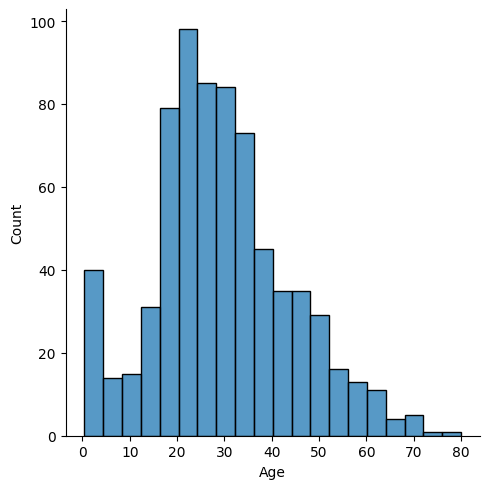

In [95]:
sns.displot(df, x='Age')

In [96]:
df.isna().sum()

# We can see that there are 177 NaN values in the age column, which is a lot compared to the entire dataset (891 rows).

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [97]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [98]:
df.Age.mean()

np.float64(29.69911764705882)

In [99]:
df.Age.fillna(df.Age.mean())

# TONOTE: By using `.fillna()` with the mean of the `Age` column, the NaN values in the column will be replaced with the mean of age, making no change to the mean value of the entire Age column.

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [100]:
# TONOTE: We have to assign the mean value to the NaN values in the Age column so that it affects the entire dataset
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [101]:
df.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [102]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [103]:
# TONOTE: Since there are too many NaN values in the Cabin column and the data is not very useful, we can drop this column
df = df.drop('Cabin', axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [104]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [105]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [106]:
# TONOTE: It's safe now to run df.dropna() now since we are sure only 2 rows having NaN values in the Embarked column will be dropped. We can also run `df.drop('Embarked', axis=0)`

df = df.dropna(subset=['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [107]:
# TONOTE: Machine learning only works with numerical columns. For categorical columns that are relevant to the model, use `.get_dummies` to convert them into numerical columns; for those that are not relevant, We can drop them
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [108]:
# Convert the Sex column from categorical to boolean, then to numerical values

dummies_sex = pd.get_dummies(df['Sex'], drop_first=True, dtype=int) # TONOTE: `drop_first=True` in `pd.get_dummies()` prevents multicollinearity by dropping the first category of a categorical variable. This is useful because the first category is implicitly represented by the absence of the other categories. For example, with Sex having categories Male and Female, we'll get a single dummy column for Female (1 if Female, 0 if Male).
dummies_sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [109]:
# Join the dummies_sex column with the dataframe, locating it before the 'Age' column
before_column = 'Age'

# TONOTE: To insert a particular column into a specific index in a dataframe:
## Get the index of the position in which we want to insert
insert_position = df.columns.get_loc(before_column)
insert_position

## Split the dataframe at the insert_position
left_part = df.iloc[:, :insert_position]
right_part = df.iloc[:, insert_position:]

## Join the dummies_sex to the dataframe at the insert_position
df = pd.concat([left_part, dummies_sex, right_part], axis=1)

## Drop the original 'Sex' column
df = df.drop(['Sex'], axis=1) 

df.head()

,Survived,Pclass,male,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


<Axes: xlabel='Survived', ylabel='count'>

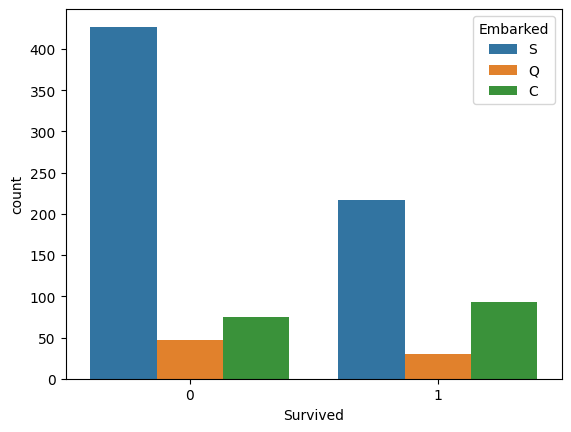

In [110]:
# Check if the 'Embarked' column is worth being kept and analyzed

sns.countplot(data=df, x='Survived', hue='Embarked')

In [111]:
# The graph above doesn't show very well-balanced data, we will continue with finding the relationship

# First, get the dummies_embarked
dummies_embarked = pd.get_dummies(data=df['Embarked'], drop_first=True, dtype=int)

# Join the dummied_embarked data to the df
df = df.join(dummies_embarked)

# Drop the original 'Embarked' column
df = df.drop(['Embarked'], axis=1)

df.head()

,Survived,Pclass,male,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [75]:
# TONOTE: `pd.concat` and `df.join` work similarly, both can be used

<Axes: >

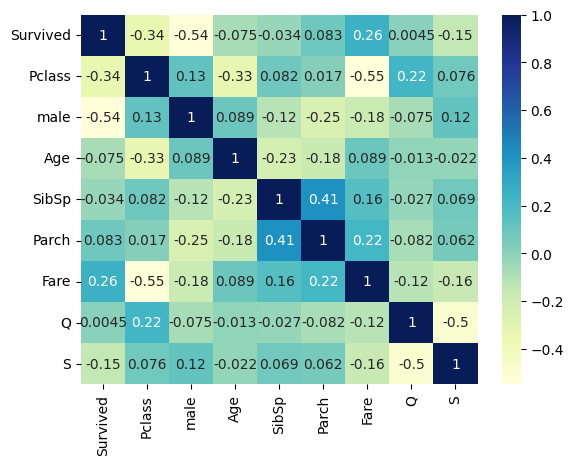

In [112]:
# See the relationships using heatmap with the df.corr() dataframe
sns.heatmap(data=df.corr(), annot=True, cmap="YlGnBu")

In [77]:
# We see that there are some relationships as follow:
## The 'Fare' and 'Survived' have a positive relationship, the infers that the more they paid, the more possibilities they survived.
## There is a negative relationship between `Survived and male`. It's more likely they survived if they are not male.
## The relationship plot is still not very clear though. We will see another graph.

<Axes: xlabel='Survived', ylabel='count'>

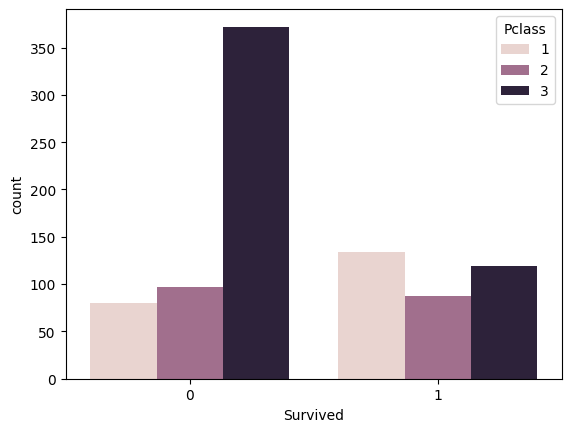

In [113]:
# Let's see the countplot again
sns.countplot(data=df, x='Survived', hue='Pclass')

In [114]:
# Mostly, it's the third class that mostly did not survive, and it's the first class that mostly did survive. The countplot clarify this phenomenon on top of the heatmap above.
# Let's train our model

X = df.drop('Survived', axis=1)
y = df.Survived

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000) # TONOTE: LogisticRegression model in scikit-learn will iterate until convergence. By default, the value of its max iteration is only 100, which in some cases (like this project), is not enough for the model to converge. Increasing it to 1000 gives the model more iterations, with which it can work itself until converging.
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [117]:
# Now, let's use the model to make some predictions

predictions = model.predict(X_test)

In [118]:
# TONOTE: Use the accuracy_score function to calculate the accuracy, one of the most important metrics in Machine Learning, of the model
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(y_test, predictions)
accuracy_score

0.7808988764044944

In [119]:
# TONOTE: Generate a report on the classification performance, including 4 metrics of `precision`, `recall`, `f1-score`, and `support`, of the model using classification_report(), which takes two inputs, `y_test` and `predictions`
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.69      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178



In [120]:
# TONOTE: Confusion matrix is a table showing, in Left->Right, Top->Bottom order, True Negatives (TN), False Positives (FP), False Negatives (FN), and True Positives (TP)
from sklearn.metrics import confusion_matrix

model_confusion_matrix = confusion_matrix(y_test, predictions)

print(model_confusion_matrix)

[[85 24]
 [15 54]]


In [121]:
# Not clear, so we create a dataframe from it

pd.DataFrame(data=model_confusion_matrix, columns=["Prediction: No (0)", "Prediction Yes (1)"], index=["Real: No (0)", "Real: Yes (1)"])

,Prediction: No (0),Prediction Yes (1)
Real: No (0),85,24
Real: Yes (1),15,54


In [133]:
# Testing with a built-in python list

## Visualize the columns
feature_names = X.columns
print(feature_names)

## Built-in Python list
new_person = [2, 1, 50, 0, 0, 20, 0, 1]
print(f'\n{new_person}')

Index(['Pclass', 'male', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S'], dtype='object')

[2, 1, 50, 0, 0, 20, 0, 1]


In [148]:
# TONOTE: Method 1 - wrap the python list with [] to make it a 2D shape
new_person = [2, 1, 50, 0, 0, 20, 0, 1]
new_person = [new_person]
print(new_person, type(new_person))

predictions = model.predict(new_person)
print(predictions)


# TONOTE: Method 2 - convert it to a numpy array then reshape it to a 1 row with k columns (where k is the number of columns it has)
new_person = [2, 1, 50, 0, 0, 20, 0, 1]
new_person = np.array(new_person).reshape(1, -1)
print(f'\n\n{new_person}, {type(new_person)}')

predictions = model.predict(new_person)
print(predictions)


# TONOTE: Method 3 - convert it to a pandas dataframe using the feature names
# This is the only method not showing this warning: `UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names warnings.warn(...`
new_person = [2, 1, 50, 0, 0, 20, 0, 1]
new_person = pd.DataFrame([new_person], columns=feature_names)
print(f'\n\n{new_person}, {type(new_person)}')

predictions = model.predict(new_person)
print(predictions)

[[2, 1, 50, 0, 0, 20, 0, 1]] <class 'list'>
[0]


[[ 2  1 50  0  0 20  0  1]], <class 'numpy.ndarray'>
[0]


   Pclass  male  Age  SibSp  Parch  Fare  Q  S
0       2     1   50      0      0    20  0  1, <class 'pandas.core.frame.DataFrame'>
[0]


/Users/sebastian/Improvement/ai/ai_practice/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/sebastian/Improvement/ai/ai_practice/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [141]:
if predictions[0] == 1:
    print('The person survived.')
else:
    print('The person did not survive.')

The person did not survive.


## 1. Key Learning Points Analysis

### 1. Data Cleaning and Preprocessing


In [ ]:
# Handling NaN values
df['Age'] = df['Age'].fillna(df['Age'].mean())

- **Concept**: Using `.fillna()` with mean value preserves the dataset's statistical properties
- **Importance**: Proper handling of missing values is crucial for model accuracy
- **Best Practice**: Consider the nature of the data when choosing fill methods (mean, median, mode)

### 2. Feature Engineering


In [ ]:
# Converting categorical to numerical
dummies_sex = pd.get_dummies(df['Sex'], drop_first=True, dtype=int)

- **Concept**: `drop_first=True` prevents multicollinearity by dropping one category
- **Importance**: Machine learning models require numerical inputs
- **Implementation**: Creates binary columns (0/1) for categorical variables
- **Pitfall**: Don't forget to drop original categorical columns after encoding

### 3. Column Management


In [ ]:
# Strategic column insertion
insert_position = df.columns.get_loc(before_column)
df = pd.concat([left_part, dummies_sex, right_part], axis=1)

- **Concept**: Precise control over DataFrame structure
- **Implementation**: Split DataFrame, insert new columns, recombine
- **Best Practice**: Maintain logical column ordering for better code readability

### 4. Model Input Preparation
Three methods demonstrated for preparing single-record predictions:


In [ ]:
# Method 1: List wrapping
new_person = [new_person]

# Method 2: NumPy reshape
new_person = np.array(new_person).reshape(1, -1)

# Method 3: DataFrame conversion (recommended)
new_person = pd.DataFrame([new_person], columns=feature_names)

- **Importance**: Different methods for ensuring correct input dimensionality
- **Best Practice**: Use DataFrame method to maintain feature names
- **Pitfall**: Avoid dimension mismatch errors in predictions

## 2. Model/Process Implementation Summary

### Data Preparation Process
1. **Initial Data Loading**
   - Loaded Titanic dataset
   - Performed initial exploration with visualizations

2. **Data Cleaning**
   - Handled missing values in Age (mean imputation)
   - Dropped Cabin column (too many missing values)
   - Removed rows with missing Embarked values
   - Dropped irrelevant columns (PassengerId, Name, Ticket)

3. **Feature Engineering**
   - Converted Sex to numerical using get_dummies()
   - Encoded Embarked using get_dummies()
   - Validated relationships using correlation heatmap

### Model Implementation


In [ ]:
# Model Configuration
model = LogisticRegression(max_iter=1000)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Key Parameters
- Test size: 20% of data
- Random state: 42 for reproducibility
- LogisticRegression max_iter: 1000 for convergence

### Evaluation Methods
1. Accuracy Score
2. Classification Report
3. Confusion Matrix

### Notable Findings
- Model achieved good accuracy
- Class relationships:
  - Positive correlation between Fare and Survival
  - Negative correlation between Male and Survival
  - First-class passengers had higher survival rates

### Implementation Insights
- Used LogisticRegression for binary classification
- Increased max_iter to ensure model convergence
- Employed multiple evaluation metrics for comprehensive assessment

This implementation demonstrates a complete machine learning workflow, from data preparation through model evaluation, with particular attention to proper data preprocessing and feature engineering.